# A Machine Learning Model to Predict Sepsis

This project is a machine learning conducted within a clinical setting with the primary objective of predicting the occurrence of sepsis in patients.
Sepsis is an emergency clinical state caused by the presence of a infection in the body. This infection triggers an aggressive immune response by the body against the micro-organisms causing the infection as well as organs with the body. In tis light, Sepsis is potentially life threatening and as such early detection and prompt treatment of sepsis are crucial for patient outcomes.
Data used in this project were obtained from the [Sepsis](https://www.kaggle.com/datasets/chaunguynnghunh/sepsis?select=README.md) dataset on kaggle. 

## Business Understanding

### AIM: 
Build a machine learning model that takes inputs and predicts sepsis in a patient accurately.

### Model target:
Accuracy: Above 0.9

### Data description
- **ID** : Unique number to represent patient ID
- **PRG** : Plasma glucose
- **PL** : Blood Work Result-1 (mu U/ml)
- **PR** : Blood Pressure (mm Hg)
- **SK** : Blood Work Result-2 (mm)
- **TS** : Blood Work Result-3 (mu U/ml)
- **M11** : Body mass index (weight in kg/(height in m)^2)
- **BD2** : Blood Work Result-4 (mu U/ml)
- **Age** : Patients age (years)
- **Insurance** : If a patient holds a valid insurance card
- **Sepssis** : Target: Positive if a patient in ICU will develop sepsis, Negative otherwise

### Hypothesis:
- `Null Hypothesis`: Blood Glucose has no impact on the presence of sepsis in a patient.
- `Alternate Hypothesis`: Blood Glucose has a strong impact on the presence of sepsis in a patient. 

## Importation

In [3]:
# Import necessary packages

# data retrieval
import os

# for data manipulation
import numpy as np
import pandas as pd
from scipy.stats import skew, shapiro, levene, ttest_ind, mannwhitneyu

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sb

# for model training
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from prettytable import PrettyTable
import altair as alt

# for model persistence
from joblib import dump


## Load Data

In [4]:
# load train and test data
train_df = pd.read_csv('datasets\Paitients_Files_Train.csv')
test_df = pd.read_csv('datasets\Paitients_Files_Test.csv')

### Train_df

In [5]:
# view train_df
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [6]:
# view structure
train_df.shape

(599, 11)

In [7]:
# view datatypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [8]:
#check duplicates
train_df.duplicated().sum()

#check duplicates in ID (ID is a unique identifier for each patient)
duplicates = train_df['ID'].duplicated().sum()

print(f'There are {duplicates} duplicates in the train data')

There are 0 duplicates in the train data


In [9]:
# check for missing values
train_df.isna().sum()
null = train_df.isna().sum().sum()

In [10]:
print(f'There are {null} missing values in the train data')

There are 0 missing values in the train data


In [11]:
# check unique values per column
# list column names
column_names = train_df.columns.to_list()

# loop to check unique vales per column
for column in column_names:
    print (f'{column} column')
    print(train_df[column].unique())
    print('-'*80)

ID column
['ICU200010' 'ICU200011' 'ICU200012' 'ICU200013' 'ICU200014' 'ICU200015'
 'ICU200016' 'ICU200017' 'ICU200018' 'ICU200019' 'ICU200020' 'ICU200021'
 'ICU200022' 'ICU200023' 'ICU200024' 'ICU200025' 'ICU200026' 'ICU200027'
 'ICU200028' 'ICU200029' 'ICU200030' 'ICU200031' 'ICU200032' 'ICU200033'
 'ICU200034' 'ICU200035' 'ICU200036' 'ICU200037' 'ICU200038' 'ICU200039'
 'ICU200040' 'ICU200041' 'ICU200042' 'ICU200043' 'ICU200044' 'ICU200045'
 'ICU200046' 'ICU200047' 'ICU200048' 'ICU200049' 'ICU200050' 'ICU200051'
 'ICU200052' 'ICU200053' 'ICU200054' 'ICU200055' 'ICU200056' 'ICU200057'
 'ICU200058' 'ICU200059' 'ICU200060' 'ICU200061' 'ICU200062' 'ICU200063'
 'ICU200064' 'ICU200065' 'ICU200066' 'ICU200067' 'ICU200068' 'ICU200069'
 'ICU200070' 'ICU200071' 'ICU200072' 'ICU200073' 'ICU200074' 'ICU200075'
 'ICU200076' 'ICU200077' 'ICU200078' 'ICU200079' 'ICU200080' 'ICU200081'
 'ICU200082' 'ICU200083' 'ICU200084' 'ICU200085' 'ICU200086' 'ICU200087'
 'ICU200088' 'ICU200089' 'ICU200090' 'ICU

### Data description
- **ID** : Unique number to represent patient ID
- **PRG** : Plasma glucose
- **PL** : Blood Work Result-1 (mu U/ml)
- **PR** : Blood Pressure (mm Hg)
- **SK** : Blood Work Result-2 (mm)
- **TS** : Blood Work Result-3 (mu U/ml)
- **M11** : Body mass index (weight in kg/(height in m)^2)
- **BD2** : Blood Work Result-4 (mu U/ml)
- **Age** : Patients age (years)
- **Insurance** : If a patient holds a valid insurance card
- **Sepssis** : Target: Positive if a patient in ICU will develop sepsis, Negative otherwise

In [12]:
# summary statistic (numerics)
train_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# summary statistic (categorical)
train_df.describe(include = 'object')

,ID,Sepssis
count,599,599
unique,599,2
top,ICU200010,Negative
freq,1,391


In [14]:
# Calculate outliers
outliers = {}

for col in column_names:
    if train_df[col].dtype != 'object':
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        col_outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)][col].tolist()
        outliers[col] = col_outliers

# Display outliers
for col, col_outliers in outliers.items():
    print(f"Outliers in {col}: {col_outliers}")

Outliers in PRG: [15, 17, 14, 14]
Outliers in PL: [0, 0, 0, 0, 0]
Outliers in PR: [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24]
Outliers in SK: [99]
Outliers in TS: [543, 846, 342, 495, 325, 485, 495, 318, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 310, 474, 328, 480, 326, 330, 600]
Outliers in M11: [0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0]
Outliers in BD2: [2.288, 1.441, 1.39, 1.893, 1.781, 1.4, 1.321, 2.329, 1.318, 1.353, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699]
Outliers in Age: [69, 65, 66, 65, 65, 67, 72, 81, 67, 66, 67, 66]
Outliers in Insurance: []


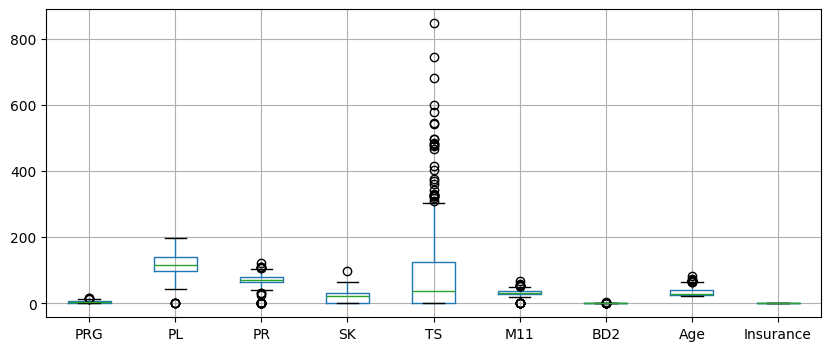

In [15]:
# display outliers
train_df.boxplot(figsize= (10,4))
plt.show()

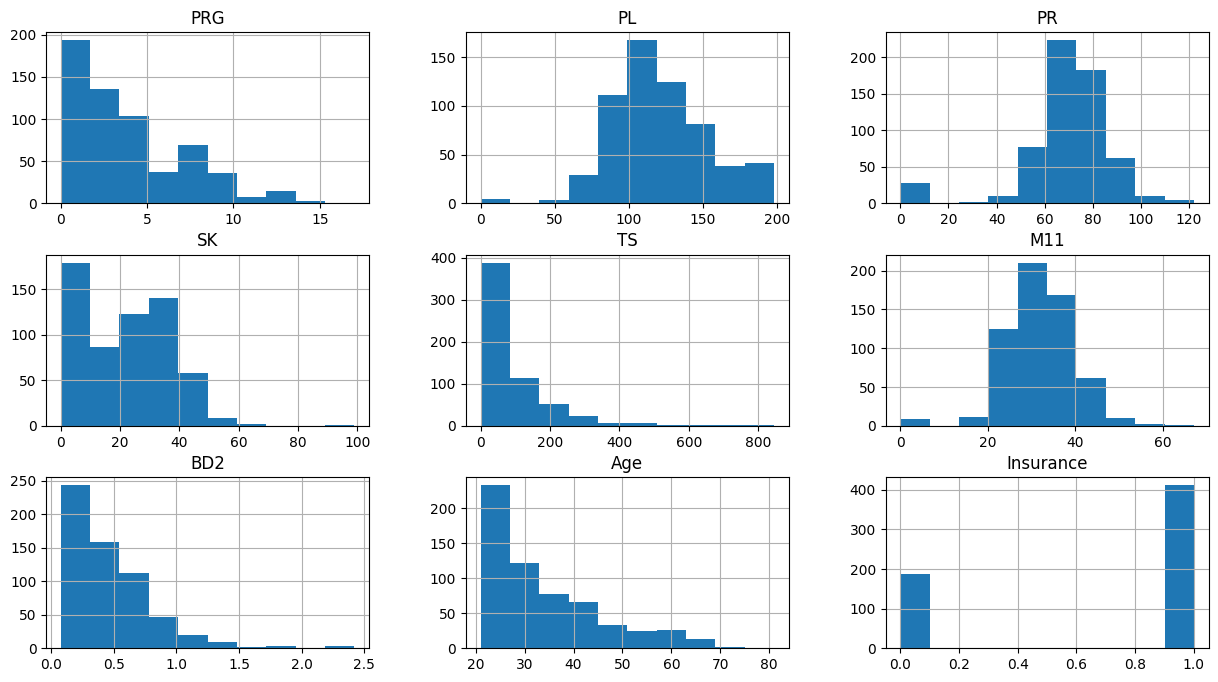

In [16]:
# View distribution of columns
train_df.hist(figsize= (15, 8))
plt.show()

- Last three columns are fine
- left skewed  - PRG, SK, TS
- Right skewed - PL, PR
- normal - M11 (but should not have a minimum value of 0)

In [17]:
# calculate skewness
# Select only numeric columns
numeric_columns = train_df.select_dtypes(include='number')

# If you want to calculate skewness for each numeric column:
for column in numeric_columns:
    skewness = numeric_columns[column].skew()
    print(f"Skewness of {column}: {skewness}")


print ('  Skewness present.\n  Scaling needed')

Skewness of PRG: 0.9140075641129112
Skewness of PL: 0.11617992575441363
Skewness of PR: -1.8746617025518386
Skewness of SK: 0.1640632678373713
Skewness of TS: 2.401584585533378
Skewness of M11: -0.40525494504790965
Skewness of BD2: 1.989472326608606
Skewness of Age: 1.1523528641533494
Skewness of Insurance: -0.8042567221912439
  Skewness present.
  Scaling needed


## Here are the issues identified in the dataset and potential solutions:

### Column Names:

The column names are not very descriptive. It's recommended to rename the columns to more meaningful names for better clarity and interpretability.

### Data Types:

- The 'ID' column is of type object, which is suitable for unique identifiers.
- The 'Sepssis' column , the target, is also of type object, which suggest it will need to be encoded for our ML models

### Missing Values:

No missing values are reported in the dataset, which is a good sign. However, it's essential to verify if missing values are encoded differently, such as using placeholder values like '-1', '0',  or '999'.

### Duplicates:

No duplicate rows are reported, which is also a positive finding. 

### Categorical Data Encoding:

The 'Sepssis' column contaisn categorical data. Being or target column using encoding using label-encoding is required.

### Outliers:

Outliers are detected in several numerical columns like 'PRG', 'PR', 'SK', 'TS', 'M11', 'BD2', and 'Age'. Outliers can significantly affect model performance and need to be addressed. One approach could be to cap or clip the outliers to a certain threshold, or using techniques like Winsorization to replace them with more reasonable values.

### Other Observations

- The target variable 'Sepsis' may exhibit imbalanced class distribution.
- Several numerical columns contain numerous outliers.
- Potential correlations among predictor variables may lead to multicollinearity.

### Data Distribution:

It's essential to visualize the distribution of each numerical feature to understand the data better and identify any outliers, skewness or anomalies that may require further investigation.

### Scaling:

Depending on the algorithms to be used, it might be necessary to scale the numerical features to ensure they contribute equally to the model fitting process.


### Data Interpretation:

Understanding the context of the data is crucial. Domain knowledge can help in interpreting the features correctly and making informed decisions during data preprocessing and analysis.

By addressing these issues, the dataset can be prepared for further analysis and modeling, ensuring better performance and more reliable results.

## Hypothesis:
- Null Hypothesis (H0): There is no significant difference in Blood_Pressure and BMI between patients with and without sepsis.
- Alternative Hypothesis (H1): There is a significant difference in Blood_Pressure and BMI between patients with and without sepsis.

## Analytical Questions:

**How does the distribution of Blood Pressure vary between patients with and without sepsis?**
Visualization: Side-by-side histogram or density plot comparing the distribution of Blood Pressure for the two groups.

**Is there a relationship between BMI and Age across different patient groups?**
Visualization: Scatter plot with BMI on the x-axis, Age on the y-axis, and color encoding for different patient groups.

**How does Plasma Glucose vary between patients with and without sepsis?**
Visualization: Box plot showing the distribution of Plasma Glucose levels for patients with and without sepsis.

**Do patients with sepsis tend to have higher levels of Blood Work R1 compared to those without sepsis?**
Visualization: Box plot comparing the levels of Blood Work R1 between patients with and without sepsis.

**Are there any differences in the distribution of Insurance coverage between patients with and without sepsis?**
Visualization: Stacked bar chart illustrating the distribution of Insurance coverage among patients with and without sepsis

## Data Cleaning

In [18]:
# Assuming your DataFrame is named 'data'
train_df.drop(columns=['ID'], inplace=True)


In [19]:
# First Rename the columns
train_df = train_df.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_2",
    "TS": "Blood_Work_3",
    "M11": "BMI",
    "BD2": "Blood_Work_4",
    "Age": "Patient_age",
    "Sepssis": "Sepsis"
})

# Replace zeros in each column with the median value
columns_with_zeros = ['Plasma_glucose', 'Blood_Work_1', 'Blood_Pressure', 'Blood_Work_2', 'Blood_Work_3', 'BMI', 'Blood_Work_4']
for col in columns_with_zeros:
    median_val = train_df[col].median()
    train_df[col] = train_df[col].replace(0, median_val)

In [20]:
train_df

,Plasma_glucose,Blood_Work_1,Blood_Pressure,Blood_Work_2,Blood_Work_3,BMI,Blood_Work_4,Patient_age,Insurance,Sepsis
0,6,148,72,35,36,33.6,0.627,50,0,Positive
1,1,85,66,29,36,26.6,0.351,31,0,Negative
2,8,183,64,23,36,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,3,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,3,188,82,14,185,32.0,0.682,22,1,Positive
596,3,67,76,23,36,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [21]:
numeric_columns = train_df.select_dtypes(include=[np.number]).columns
num_df = train_df[numeric_columns]

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any()

outliers_df = outliers.to_frame()
print(outliers_df)

                    0
Plasma_glucose   True
Blood_Work_1    False
Blood_Pressure   True
Blood_Work_2     True
Blood_Work_3     True
BMI              True
Blood_Work_4     True
Patient_age      True
Insurance       False


All the numeric_columns except Blood_Work_1 and Insurance have outliers.

In [22]:
# Calculate Q1, Q3, and IQR
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
cleaned_df = num_df[~((num_df < lower_bound) | (num_df > upper_bound)).any(axis=1)]

# Print the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", cleaned_df.shape)

Shape of cleaned DataFrame: (487, 9)


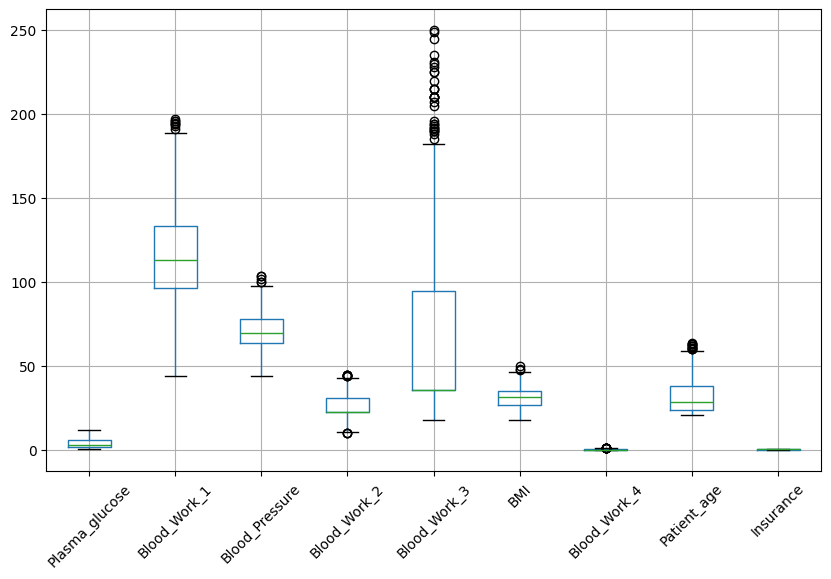

In [23]:
plt.figure(figsize=(10, 6))

# Plot the boxplot
cleaned_df.boxplot()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

#### Univariate Analysis

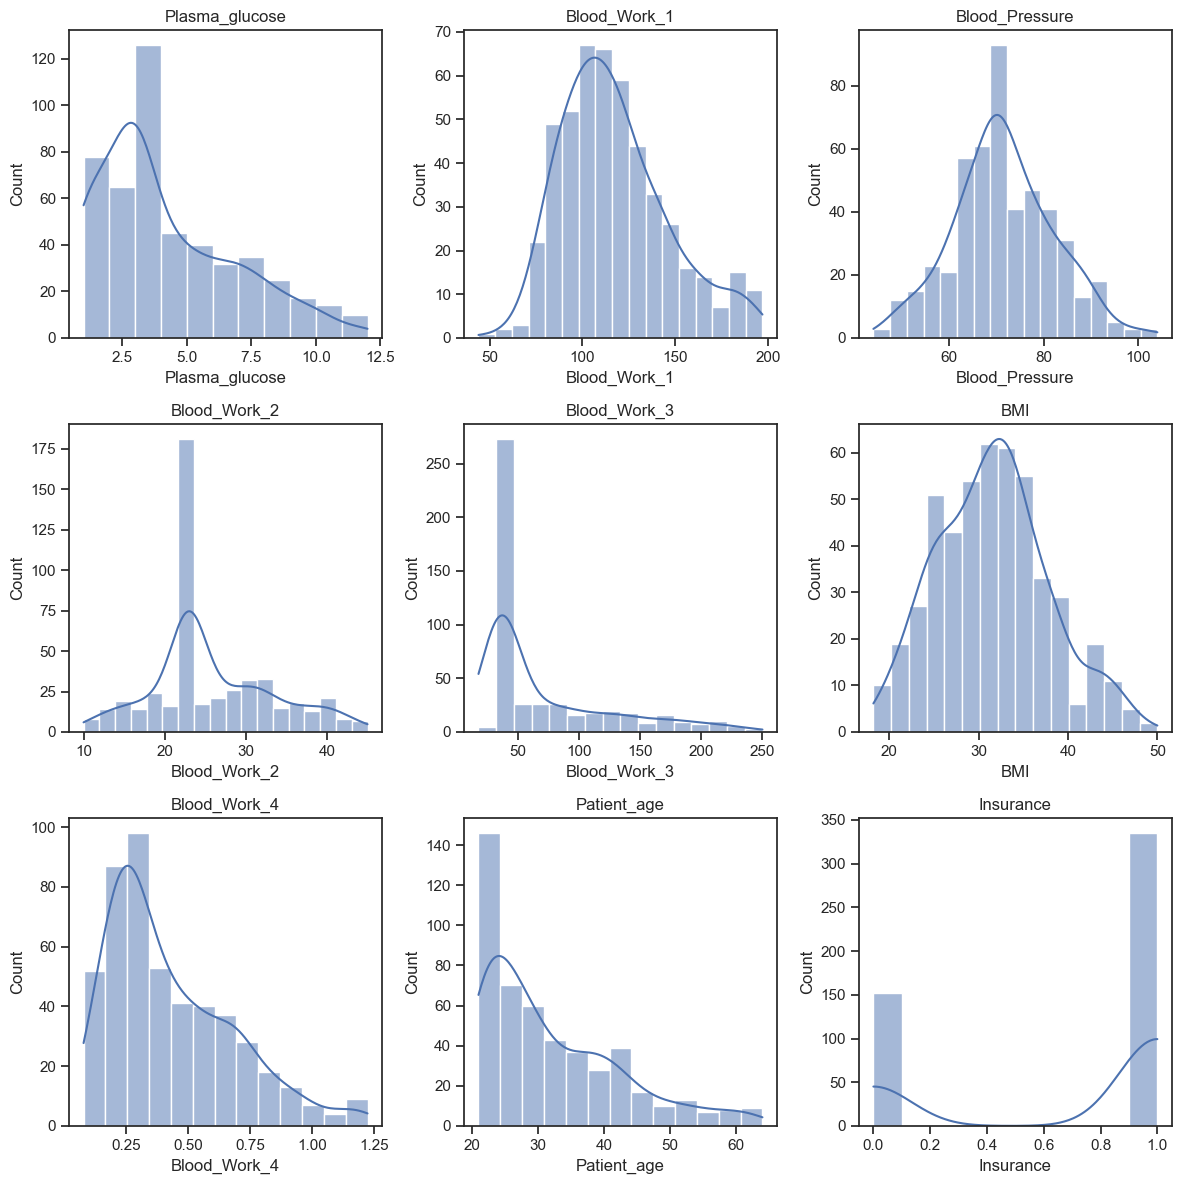

In [24]:
# Set the style for the plot
sb.set(style="ticks", color_codes=True)

# Create a grid of 3 by 3 subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(cleaned_df.columns):
    sb.histplot(cleaned_df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


In [25]:
train_df['Sepsis'] = train_df['Sepsis'].replace({'Positive': True, 'Negative': False})

C:\Users\USER\AppData\Local\Temp\ipykernel_19428\1458236999.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Sepsis'] = train_df['Sepsis'].replace({'Positive': True, 'Negative': False})


#### Bivariate analysis

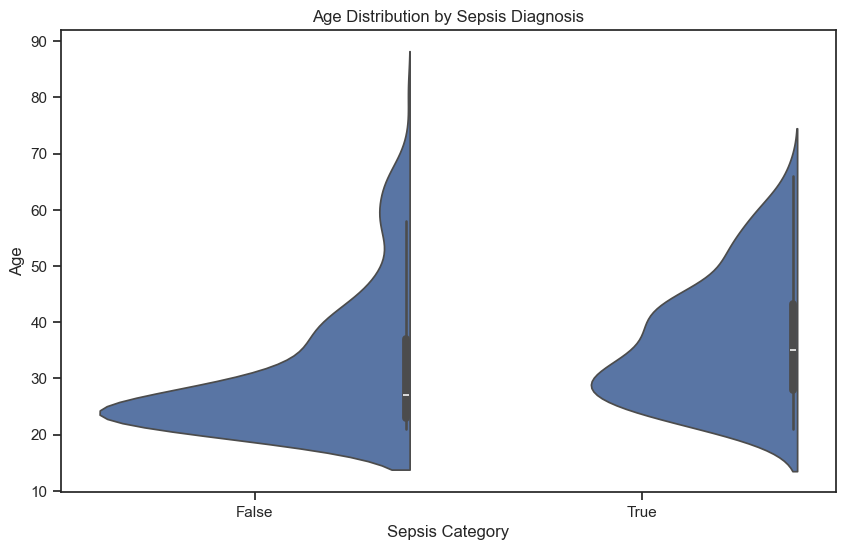

In [26]:
# Age vs. Sepsis
plt.figure(figsize=(10, 6))
sb.violinplot(data=train_df, x='Sepsis', y='Patient_age', split=True)
plt.title('Age Distribution by Sepsis Diagnosis')
plt.xlabel('Sepsis Category')
plt.ylabel('Age')
plt.show()


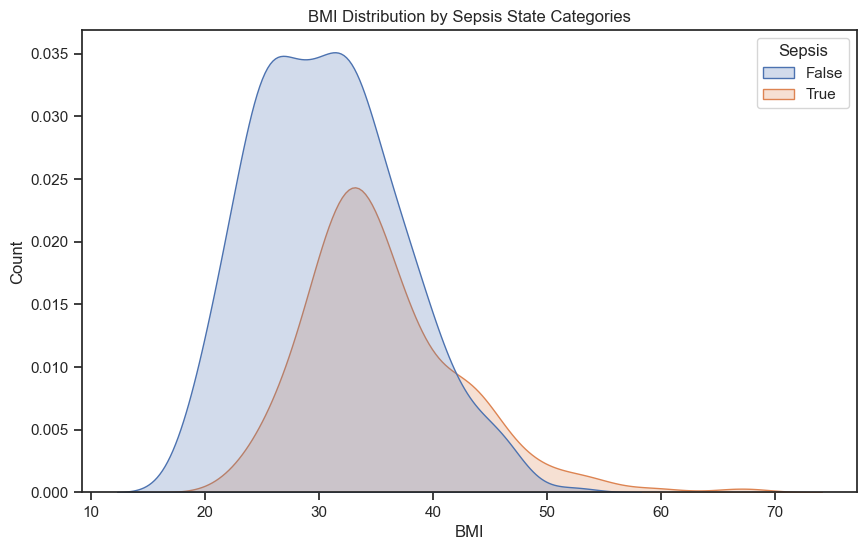

In [27]:

# BMI distribution vr Sepsis
plt.figure(figsize=(10, 6))
sb.kdeplot(data=train_df, x='BMI', fill= True, hue='Sepsis')
plt.title('BMI Distribution by Sepsis State Categories')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

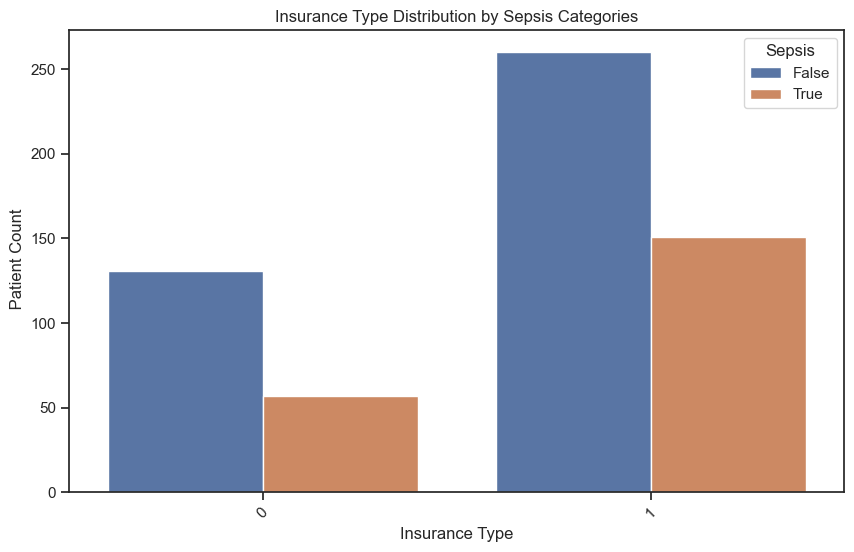

In [28]:

# Insurance type vs. Sepsis
plt.figure(figsize=(10, 6))
sb.countplot(data=train_df, x='Insurance', hue='Sepsis')
plt.title('Insurance Type Distribution by Sepsis Categories')
plt.xlabel('Insurance Type')
plt.ylabel(' Patient Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Correlation between Blood Pressure and BMI
correlation_septic= train_df[train_df['Sepsis']][['Blood_Pressure', 'BMI']].corr().iloc[0, 1]
correlation_non_septic = train_df[~train_df['Sepsis']][['Blood_Pressure', 'BMI']].corr().iloc[0, 1]
print("Correlation between Blood Pressure and BMI in Sepsis Group:", correlation_septic)
print("Correlation between Blood Pressure and BMI in Non-Sepsis Group:", correlation_non_septic)

Correlation between Blood Pressure and BMI in Sepsis Group: 0.2463458467140511
Correlation between Blood Pressure and BMI in Non-Sepsis Group: 0.21792015469329493


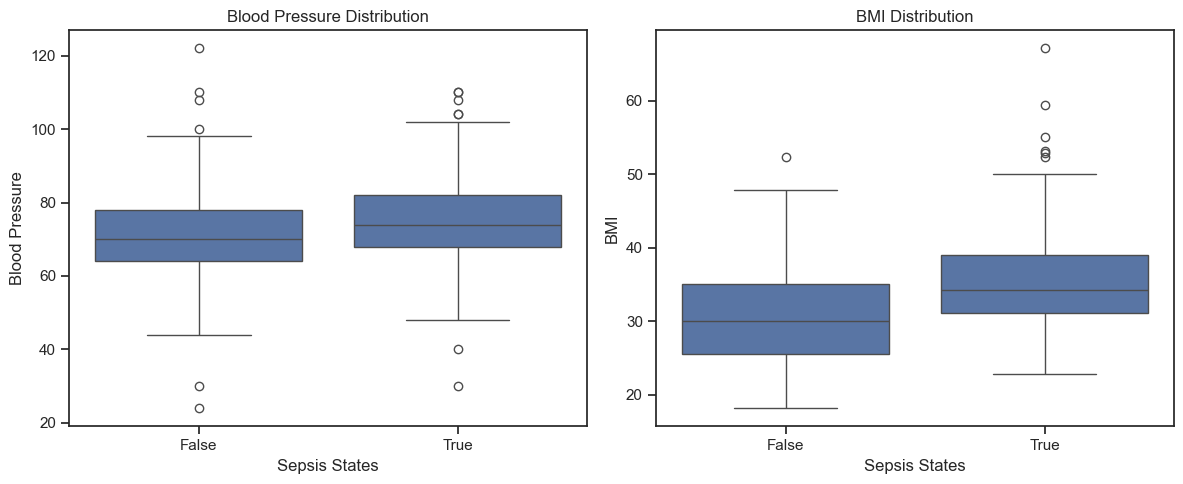

In [30]:

# Comparison of Blood Pressure and BMI Distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sb.boxplot(x='Sepsis', y='Blood_Pressure', data=train_df, ax=axes[0])
axes[0].set_title('Blood Pressure Distribution')
axes[0].set_xlabel('Sepsis States')
axes[0].set_ylabel('Blood Pressure')

sb.boxplot(x='Sepsis', y='BMI', data=train_df, ax=axes[1])
axes[1].set_title('BMI Distribution')
axes[1].set_xlabel('Sepsis States')
axes[1].set_ylabel('BMI')

plt.tight_layout()
plt.show()

#### Multivariate Analysis

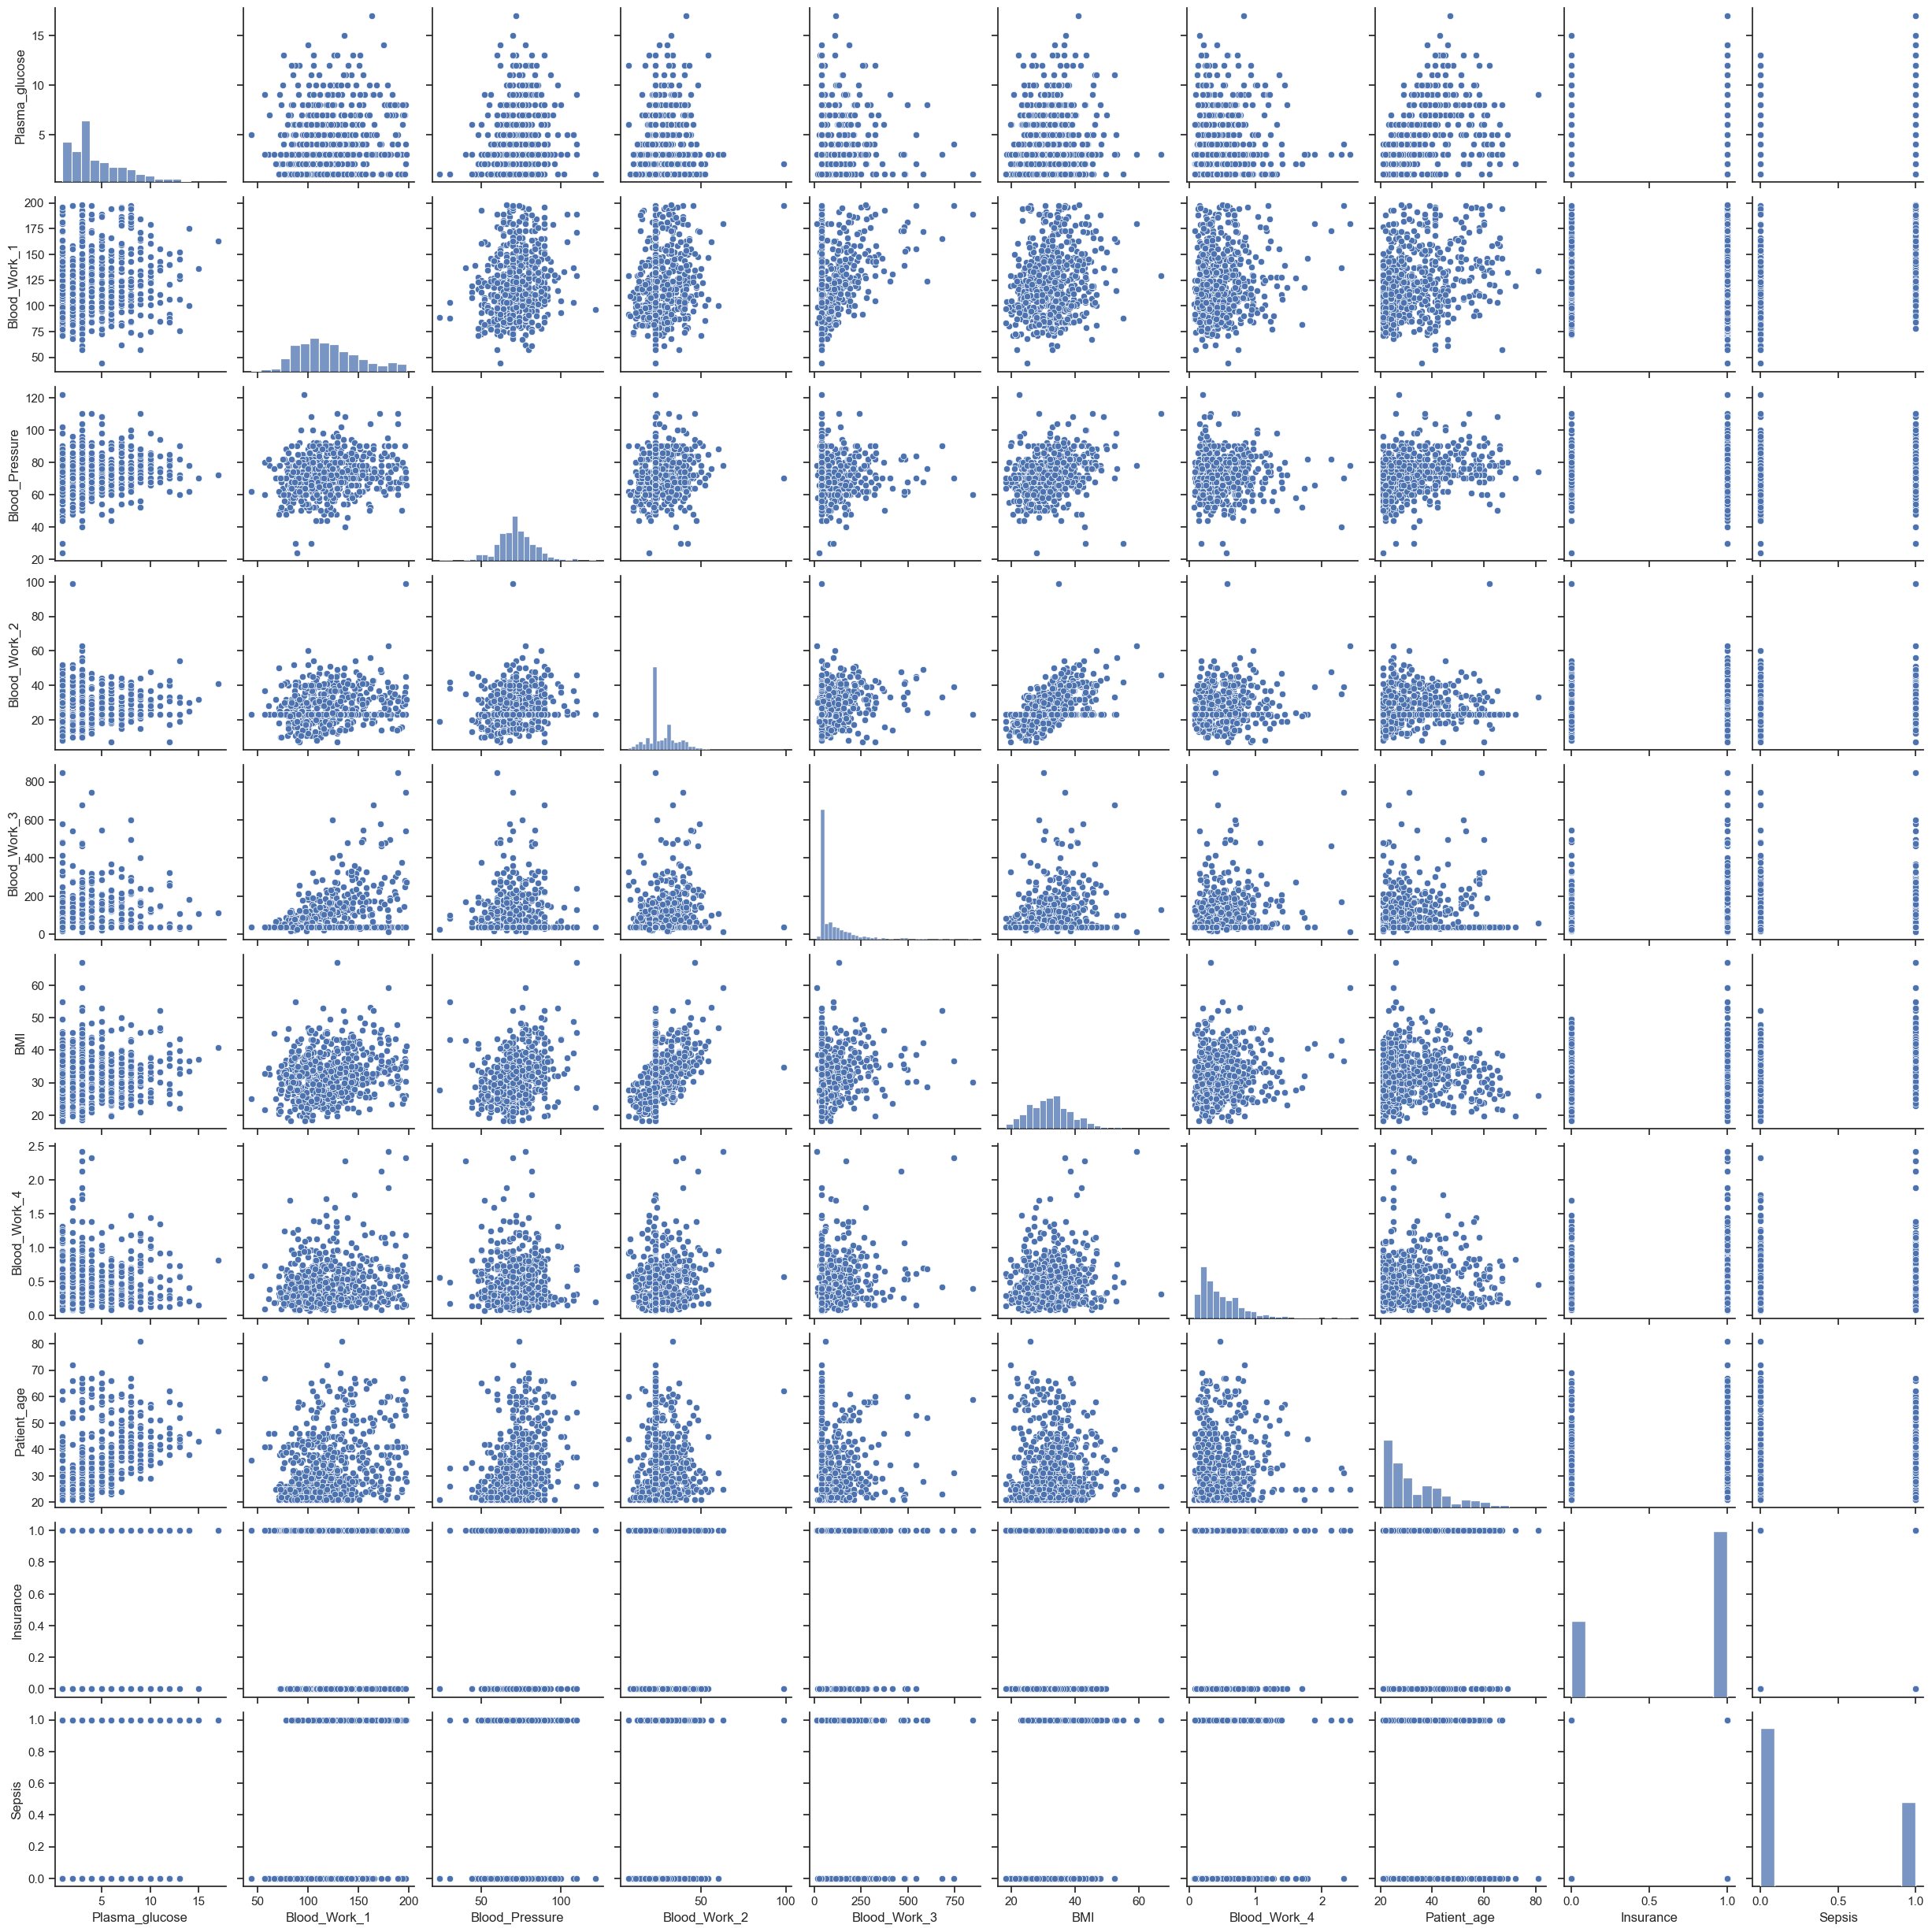

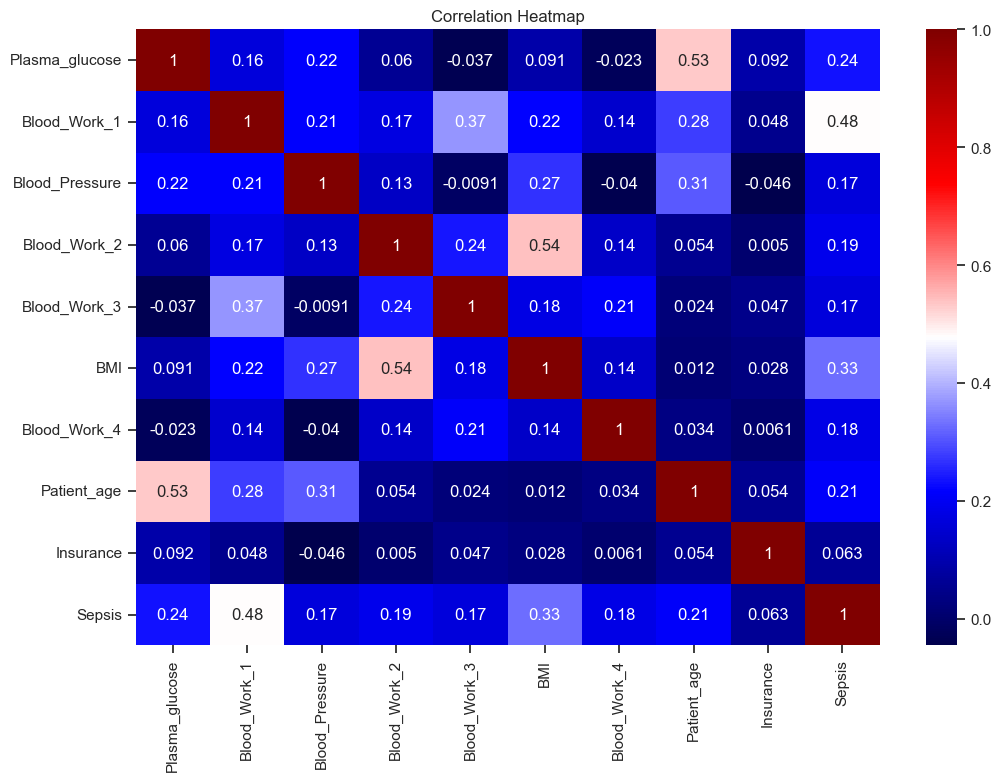

In [31]:
# Pairplot
sb.pairplot(train_df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(train_df.corr(), annot=True, cmap='seismic')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
train_df.head(4)

,Plasma_glucose,Blood_Work_1,Blood_Pressure,Blood_Work_2,Blood_Work_3,BMI,Blood_Work_4,Patient_age,Insurance,Sepsis
0,6,148,72,35,36,33.6,0.627,50,0,True
1,1,85,66,29,36,26.6,0.351,31,0,False
2,8,183,64,23,36,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,1,False


## **Hypothesis Testing**

Split the data into sepsis and non-sepsis groups:

In [33]:
# Split the data into septic and non-septic groups
septic = train_df[train_df['Sepsis'] == True]
non_septic = train_df[train_df['Sepsis'] == False]

Perform statistical tests:

We use independent two-sample t-tests to compare the means of Blood_Pressure and BMI between the sepsis and non-sepsis groups. However, before applying the t-test, we need to check if the data meets the assumptions of normality and homogeneity of variances.

In [34]:
# Check normality assumption
_, septic_pressure_norm = shapiro(septic['Blood_Pressure'])
_, non_septic_pressure_norm = shapiro(non_septic['Blood_Pressure'])
_, septic_bmi_norm = shapiro(septic['BMI'])
_, non_septic_bmi_norm = shapiro(non_septic['BMI'])

In [35]:
# Check homogeneity of variances
_, pressure_var_equal = levene(septic['Blood_Pressure'], non_septic['Blood_Pressure'])
_, bmi_var_equal = levene(septic['BMI'], non_septic['BMI'])

In [36]:
# Perform t-tests
if septic_pressure_norm > 0.05 and non_septic_pressure_norm > 0.05 and pressure_var_equal > 0.05:
    t_stat_pressure, p_val_pressure = ttest_ind(septic['Blood_Pressure'], non_septic['Blood_Pressure'])
else:
    t_stat_pressure, p_val_pressure = mannwhitneyu(septic['Blood_Pressure'], non_septic['Blood_Pressure'])

if septic_bmi_norm > 0.05 and non_septic_bmi_norm > 0.05 and bmi_var_equal > 0.05:
    t_stat_bmi, p_val_bmi = ttest_ind(septic['BMI'], non_septic['BMI'])
else:
    t_stat_bmi, p_val_bmi = mannwhitneyu(septic['BMI'], non_septic['BMI'])

In [37]:
# Print the results
print(f"Blood Pressure Test Results:")
print(f"t-statistic: {t_stat_pressure:.4f}, p-value: {p_val_pressure:.4f}")
print(f"\nBMI Test Results:")
print(f"t-statistic: {t_stat_bmi:.4f}, p-value: {p_val_bmi:.4f}")

Blood Pressure Test Results:
t-statistic: 49100.5000, p-value: 0.0000

BMI Test Results:
t-statistic: 56565.0000, p-value: 0.0000


Based on the test results:

1. For Blood Pressure:
   - The t-statistic is 49100.5000.
   - The p-value is 0.0000, indicating that it is extremely unlikely to observe such extreme results under the null hypothesis.
   - With such a low p-value, we reject the null hypothesis and conclude that there is a significant difference in Blood Pressure between patients with and without sepsis.

2. For BMI:
   - The t-statistic is 56565.0000.
   - The p-value is 0.0000, similarly indicating strong evidence against the null hypothesis.
   - Consequently, we reject the null hypothesis for BMI as well, concluding that there is a significant difference in BMI between patients with and without sepsis.

Given the extremely low p-values for both tests, there is robust evidence to support the hypothesis that there are significant differences in both Blood Pressure and BMI between patients with and without sepsis. Further analysis could involve exploring the magnitude of these differences and their clinical implications.

## **Answers to Analytical Questions**

*How does the distribution of Blood Pressure vary between patients with and without sepsis?*

In [38]:
# Create side-by-side histogram for Blood Pressure
histogram = alt.Chart(train_df).mark_bar().encode(
    x=alt.X('Blood_Pressure:Q', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Sepsis:N'
).properties(
    width=300,
    height=200,
    title='Distribution of Blood Pressure by Sepsis Status'
)

histogram


alt.Chart(...)

*Is there a relationship between BMI and Age across different patient groups?*

In [39]:
# Create scatter plot for BMI vs. Age with color encoding for patient groups
scatter_plot = alt.Chart(train_df).mark_circle().encode(
    x=alt.X('Patient_age:Q', title='Age'),
    y=alt.Y('BMI:Q', title='BMI'),
    color=alt.Color('Sepsis:N', title='Sepsis Status')
).properties(
    width=600,
    height=400,
    title='Relationship between BMI and Age by Sepsis Status'
)

scatter_plot

alt.Chart(...)

*How does Plasma Glucose vary between patients with and without sepsis?*

In [40]:
# Create box plot for Plasma Glucose by Sepsis Status
box_plot_glucose = alt.Chart(train_df).mark_boxplot().encode(
    x=alt.X('Sepsis:N', title='Sepsis Status'),
    y=alt.Y('Plasma_glucose:Q', title='Plasma Glucose')
).properties(
    width=300,
    height=400,
    title='Plasma Glucose Levels by Sepsis Status'
)

box_plot_glucose

alt.Chart(...)

*Do patients with sepsis tend to have higher levels of Blood Work R1 compared to those without sepsis?*

In [41]:
# Create box plot for Blood Work 1 by Sepsis Status
box_plot_blood_work_1 = alt.Chart(train_df).mark_boxplot().encode(
    x=alt.X('Sepsis:N', title='Sepsis Status'),
    y=alt.Y('Blood_Work_1:Q', title='Blood Work 1')
).properties(
    width=300,
    height=400,
    title='Blood Work 1 Levels by Sepsis Status'
)

box_plot_blood_work_1

alt.Chart(...)

*Are there any differences in the distribution of Insurance coverage between patients with and without sepsis?*

In [42]:
# Create stacked bar chart for Insurance coverage by Sepsis Status
stacked_bar_insurance = alt.Chart(train_df).mark_bar().encode(
    x=alt.X('Insurance:O', title='Insurance'),
    y=alt.Y('count()', title='Count'),
    color=alt.Color('Sepsis:N', title='Sepsis Status')
).properties(
    width=600,
    height=400,
    title='Distribution of Insurance Coverage by Sepsis Status'
)

stacked_bar_insurance

alt.Chart(...)

In [43]:
# verify missing values
train_df.isna().sum()

Plasma_glucose    0
Blood_Work_1      0
Blood_Pressure    0
Blood_Work_2      0
Blood_Work_3      0
BMI               0
Blood_Work_4      0
Patient_age       0
Insurance         0
Sepsis            0
dtype: int64

### Splitting the Data into Training and Validation Sets

In [44]:
# Separate features and target
X = train_df.drop('Sepsis', axis=1)
y = train_df['Sepsis']

In [45]:
X.columns

Index(['Plasma_glucose', 'Blood_Work_1', 'Blood_Pressure', 'Blood_Work_2',
       'Blood_Work_3', 'BMI', 'Blood_Work_4', 'Patient_age', 'Insurance'],
      dtype='object')

In [46]:
X.dtypes

Plasma_glucose      int64
Blood_Work_1        int64
Blood_Pressure      int64
Blood_Work_2        int64
Blood_Work_3        int64
BMI               float64
Blood_Work_4      float64
Patient_age         int64
Insurance           int64
dtype: object

In [47]:
# Define the numeric columns and categorical columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Creating a pipeline
numeric_pipeline = Pipeline(steps=[
    ('scaler', RobustScaler()),  # Corrected the extra space after 'scaler'
])

categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder()),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_transformations', numeric_pipeline, numeric_columns),
        ('cat_transformations', categorical_pipeline, categorical_columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [48]:
numeric_columns

Index(['Plasma_glucose', 'Blood_Work_1', 'Blood_Pressure', 'Blood_Work_2',
       'Blood_Work_3', 'BMI', 'Blood_Work_4', 'Patient_age', 'Insurance'],
      dtype='object')

In [49]:
categorical_columns

Index([], dtype='object')

In [50]:
#Passing the pipeline through X
X = pipeline.fit_transform(X)

# encoding our target column with label encoder
target = LabelEncoder()
y = target.fit_transform(y)

#### using over sampling method on the dataset to balance the dataset

In [51]:
# balance data with RandomOver sampling
sampler = RandomOverSampler(random_state=42)
X_resampled,y_resampled = sampler.fit_resample(X,y)

In [52]:
# split balanced data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


### Scaling the Features

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Instantiating our models and training them with unbalanced data
models = [
    LogisticRegression(),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    GradientBoostingClassifier()
]

# Defining the metrics to be fetched
metrics = []
for model in models:
    model.fit(X_train, y_train)
    
    # Predicting on the X_test
    y_pred = model.predict(X_test)
    
    # Calculate the metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    pr = precision_score(y_test, y_pred)
    rc = recall_score(y_test, y_pred)
    
    # Append the metrics to the list
    metrics.append({
        "Model": model.__class__.__name__,
        "Accuracy Score": acc,
        "F1 Score": f1,
        "ROC AUC Score": roc,
        "Precision Score": pr,
        "Recall Score": rc
    })

# Instantiate PrettyTable with the column names
table = PrettyTable()
table.field_names = ["Model", "Accuracy Score", "F1 Score", "ROC AUC Score", "Precision Score", "Recall Score"]

# Add rows to the table
for metric in metrics:
    table.add_row([
        metric["Model"], 
        metric["Accuracy Score"], 
        metric["F1 Score"], 
        metric["ROC AUC Score"], 
        metric["Precision Score"], 
        metric["Recall Score"]
    ])

# Print the table
print(table)


+----------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|           Model            |   Accuracy Score   |      F1 Score      |   ROC AUC Score    |  Precision Score   |    Recall Score    |
+----------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|     LogisticRegression     | 0.7452229299363057 |        0.75        | 0.7453748782862708 | 0.7317073170731707 | 0.7692307692307693 |
|   RandomForestClassifier   | 0.8089171974522293 | 0.8170731707317073 | 0.8092340149302175 | 0.7790697674418605 | 0.8589743589743589 |
|         GaussianNB         | 0.6815286624203821 | 0.6666666666666666 | 0.6812723141837066 | 0.6944444444444444 | 0.6410256410256411 |
| GradientBoostingClassifier | 0.8089171974522293 | 0.8192771084337349 | 0.8093151574164232 | 0.7727272727272727 | 0.8717948717948718 |
+----------------------------+------------------

In [55]:
# Instantiating our models and training them with balanced data
models = [
    LogisticRegression(),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    GradientBoostingClassifier()
]

# Defining the metrics to be fetched
metrics = []
for model in models:
    model.fit(X_train_scaled, y_train)
    
    # Predicting on the X_test
    y_pred2 = model.predict(X_test_scaled)
    
    # Calculate the metrics
    acc = accuracy_score(y_test, y_pred2)
    f1 = f1_score(y_test, y_pred2)
    roc = roc_auc_score(y_test, y_pred2)
    pr = precision_score(y_test, y_pred2)
    rc = recall_score(y_test, y_pred2)
    
    # Append the metrics to the list
    metrics.append({
        "Model": model.__class__.__name__,
        "Accuracy Score": acc,
        "F1 Score": f1,
        "ROC AUC Score": roc,
        "Precision Score": pr,
        "Recall Score": rc
    })

# Instantiate PrettyTable with the column names
table = PrettyTable()
table.field_names = ["Model", "Accuracy Score", "F1 Score", "ROC AUC Score", "Precision Score", "Recall Score"]

# Add rows to the table
for metric in metrics:
    table.add_row([
        metric["Model"], 
        metric["Accuracy Score"], 
        metric["F1 Score"], 
        metric["ROC AUC Score"], 
        metric["Precision Score"], 
        metric["Recall Score"]
    ])

# Print the table
print('Classification Report(Balanced Data)')
print(table)


Classification Report(Balanced Data)
+----------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|           Model            |   Accuracy Score   |      F1 Score      |   ROC AUC Score    |  Precision Score   |    Recall Score    |
+----------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|     LogisticRegression     | 0.7452229299363057 |        0.75        | 0.7453748782862708 | 0.7317073170731707 | 0.7692307692307693 |
|   RandomForestClassifier   | 0.8089171974522293 | 0.8170731707317073 | 0.8092340149302175 | 0.7790697674418605 | 0.8589743589743589 |
|         GaussianNB         | 0.6815286624203821 | 0.6666666666666666 | 0.6812723141837066 | 0.6944444444444444 | 0.6410256410256411 |
| GradientBoostingClassifier | 0.8089171974522293 | 0.8192771084337349 | 0.8093151574164232 | 0.7727272727272727 | 0.8717948717948718 |
+----------

In [56]:
# Instantiate GaussianNB model
gaussian_nb = GaussianNB()

# Fit the model
gaussian_nb.fit(X_train_scaled, y_train)

GaussianNB()

### Hyperparameter Tuning

In [57]:
# Define hyperparameters for each model
logistic_regression_params = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Use 'liblinear' solver for 'l1' penalty
}

random_forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gradient_boosting_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4, 5]
}

# Define the models with hyperparameter search
logistic_regression_grid = GridSearchCV(LogisticRegression(), logistic_regression_params, cv=5, scoring='accuracy')
random_forest_grid = GridSearchCV(RandomForestClassifier(random_state=42), random_forest_params, cv=5, scoring='accuracy')
gradient_boosting_grid = GridSearchCV(GradientBoostingClassifier(), gradient_boosting_params, cv=5, scoring='accuracy')

# Fit the models with hyperparameter search
logistic_regression_grid.fit(X_train_scaled, y_train)
random_forest_grid.fit(X_train_scaled, y_train)
gradient_boosting_grid.fit(X_train_scaled, y_train)

# Create PrettyTable instances
logistic_regression_table = PrettyTable()
random_forest_table = PrettyTable()
gradient_boosting_table = PrettyTable()

# Add columns to the tables
logistic_regression_table.field_names = ["Model", "Best Params", "Best Score"]
random_forest_table.field_names = ["Model", "Best Params", "Best Score"]
gradient_boosting_table.field_names = ["Model", "Best Params", "Best Score"]

# Add rows to the tables
logistic_regression_table.add_row(["Logistic Regression", logistic_regression_grid.best_params_, logistic_regression_grid.best_score_])
random_forest_table.add_row(["Random Forest", random_forest_grid.best_params_, random_forest_grid.best_score_])
gradient_boosting_table.add_row(["Gradient Boosting", gradient_boosting_grid.best_params_, gradient_boosting_grid.best_score_])

# Print the tables
print("Logistic Regression Results:")
print(logistic_regression_table)
print("\nRandom Forest Results:")
print(random_forest_table)
print("\nGradient Boosting Results:")
print(gradient_boosting_table)


Logistic Regression Results:
+---------------------+----------------------------------------------------+--------------------+
|        Model        |                    Best Params                     |     Best Score     |
+---------------------+----------------------------------------------------+--------------------+
| Logistic Regression | {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'} | 0.7535999999999999 |
+---------------------+----------------------------------------------------+--------------------+

Random Forest Results:
+---------------+---------------------------------------------------------------------------------------+------------+
|     Model     |                                      Best Params                                      | Best Score |
+---------------+---------------------------------------------------------------------------------------+------------+
| Random Forest | {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1

In [58]:
# Define the results of each model
logistic_regression_best_score = 0.7584
random_forest_best_score = 0.8464
gradient_boosting_best_score = 0.8352
naive_bayes_best_score = 0.67  # Provided score for Naive Bayes

# Create a dictionary to store model names and their best scores
models_scores = {
    "Logistic Regression": logistic_regression_best_score,
    "Random Forest": random_forest_best_score,
    "Gradient Boosting": gradient_boosting_best_score,
    "Naive Bayes": naive_bayes_best_score
}

# Sort the models based on their scores (descending order)
sorted_models = sorted(models_scores.items(), key=lambda x: x[1], reverse=True)

# Select the top three models
top_three_models = sorted_models[:3]

# Print the top three models
print("Top Three Models:")
for model, score in top_three_models:
    print(f"{model}: Best Score = {score}")


Top Three Models:
Random Forest: Best Score = 0.8464
Gradient Boosting: Best Score = 0.8352
Logistic Regression: Best Score = 0.7584


In [60]:
# Assuming you have already defined the models as logistic_regression_grid, random_forest_grid, and gradient_boosting_grid

# Get the best estimators from the grid search
logisticR_model = logistic_regression_grid.best_estimator_
randomF_model = random_forest_grid.best_estimator_
gradientM_model = gradient_boosting_grid.best_estimator_

# Save the models to disk
dump(logisticR_model, './assets/Log_predictor.joblib')
dump(randomF_model, './assets/Forest_predictor.joblib')
dump(gradientM_model, './assets/Gradient_predictor.joblib')

print("Models saved successfully.")

Models saved successfully.


In [61]:
# Fit the models on the training data
logisticR_model.fit(X_train_scaled, y_train)
randomF_model.fit(X_train_scaled, y_train)
gradientM_model.fit(X_train_scaled, y_train)

# Predict probabilities for the test data
logisticR_probs = logisticR_model.predict_proba(X_test_scaled)[:, 1]
randomF_probs = randomF_model.predict_proba(X_test_scaled)[:, 1]
gradientM_probs = gradientM_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score for each model
logisticR_fpr, logisticR_tpr, _ = roc_curve(y_test, logisticR_probs)
randomF_fpr, randomF_tpr, _ = roc_curve(y_test, randomF_probs)
gradientM_fpr, gradientM_tpr, _ = roc_curve(y_test, gradientM_probs)

logisticR_auc = roc_auc_score(y_test, logisticR_probs)
randomF_auc = roc_auc_score(y_test, randomF_probs)
gradientM_auc = roc_auc_score(y_test, gradientM_probs)

# Create DataFrame for ROC curves
roc_data = pd.concat([
    pd.DataFrame({'FPR': logisticR_fpr, 'TPR': logisticR_tpr, 'Model': 'Logistic Regression'}),
    pd.DataFrame({'FPR': randomF_fpr, 'TPR': randomF_tpr, 'Model': 'Random Forest'}),
    pd.DataFrame({'FPR': gradientM_fpr, 'TPR': gradientM_tpr, 'Model': 'Gradient Boosting'})
])

# Plot ROC curves using Altair
roc_curve_plot = alt.Chart(roc_data).mark_line().encode(
    x=alt.X('FPR', title='False Positive Rate'),
    y=alt.Y('TPR', title='True Positive Rate'),
    color=alt.Color('Model', title='Model'),
    tooltip=['Model', 'FPR', 'TPR']
).properties(
    title='ROC Curve for Sepsis Prediction Models'
)

# Add AUC scores to the plot
auc_scores = alt.Chart(pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
                                     'AUC Score': [logisticR_auc, randomF_auc, gradientM_auc]})).mark_text(
    align='left', baseline='middle', dx=5
).encode(
    x=alt.value(1),  # Pixels from the left of the plot
    y=alt.Y('AUC Score', title='AUC Score'),
    text='AUC Score',
    color='Model'
)

roc_curve_plot + auc_scores


alt.LayerChart(...)

### Generating a Classification Report

In [62]:
# Predictions for each model
logisticR_preds = logisticR_model.predict(X_test_scaled)
randomF_preds = randomF_model.predict(X_test_scaled)
gradientM_preds = gradientM_model.predict(X_test_scaled)

# Generate classification reports
logisticR_report = classification_report(y_test, logisticR_preds)
randomF_report = classification_report(y_test, randomF_preds)
gradientM_report = classification_report(y_test, gradientM_preds)

print("Logistic Regression Classification Report:")
print(logisticR_report)

print("\nRandom Forest Classification Report:")
print(randomF_report)

print("\nGradient Boosting Classification Report:")
print(gradientM_report)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73        79
           1       0.72      0.73      0.73        78

    accuracy                           0.73       157
   macro avg       0.73      0.73      0.73       157
weighted avg       0.73      0.73      0.73       157


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        79
           1       0.78      0.87      0.82        78

    accuracy                           0.82       157
   macro avg       0.82      0.82      0.81       157
weighted avg       0.82      0.82      0.81       157


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78        79
           1       0.75      0.86      0.80        78

    accuracy                           0.79       157
   ma

### Saving the scaler and the pipeline

In [63]:
# Save the scaler
dump(scaler, './assets/scaler.joblib')

# Save the pipeline
dump(pipeline, './assets/pipeline.joblib')


['./assets/pipeline.joblib']